In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%cd ..

/home/rainorangelemon/Documents/tiny-diffusion


/home/rainorangelemon/micromamba/envs/robodiff/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
# %%bash

# #!/bin/bash

# experiments=('product_a1' 'product_a2' 'summation_a1' 'summation_a2' 'negation_a1' 'negation_a2')

# for exp in "${experiments[@]}"
# do
#     python ddpm.py --experiment_name "$exp" --dataset "$exp" --num_epochs 1000 --mlp_type energy
# done

wandb: Currently logged in as: rainorangelemon. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.3
wandb: Run data is saved locally in /home/rainorangelemon/Documents/tiny-diffusion/wandb/run-20240509_163420-oqhbgnzm
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run product_a1
wandb: ⭐️ View project at https://wandb.ai/rainorangelemon/ddpm
wandb: 🚀 View run at https://wandb.ai/rainorangelemon/ddpm/runs/oqhbgnzm


Training model...


100%|██████████| 50/50 [00:00<00:00, 884.45it/s]


Saving model...
Saving EMA model...
Saving images...
Saving loss as numpy array...
Saving frames...


wandb: - 3.792 MB of 3.792 MB uploaded (0.007 MB deduped)
wandb: Run history:
wandb:        loss ▅▇▅▆▆▅▅▃▄▇▃▅▃▆▅▁▃▆▃▃▃█▅▄▆▇▆▅▇▇▅▄▃▃▂▂▄▄▃▅
wandb: max_predict ▅▅▂▄▂▃▄▃▆▅▆▃▅▅▄▆▄▄▇█▄▄▅▅▄▄▆▅▅▇█▆█▆▅▃▅█▆▁
wandb:        step ▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb: 
wandb: Run summary:
wandb:        loss 0.32812
wandb: max_predict 2.26851
wandb:        step 62999
wandb: 
wandb: 🚀 View run product_a1 at: https://wandb.ai/rainorangelemon/ddpm/runs/oqhbgnzm
wandb: ️⚡ View job at https://wandb.ai/rainorangelemon/ddpm/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjE2NjgwNjg1NA==/version_details/v6
wandb: Synced 6 W&B file(s), 0 media file(s), 3 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20240509_163420-oqhbgnzm/logs
wandb: Currently logged in as: rainorangelemon. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.3
wandb: Run data is saved 

Training model...


100%|██████████| 50/50 [00:00<00:00, 905.84it/s]


In [2]:
import torch
import ddpm
model_1 = ddpm.EnergyMLP()

model_2 = ddpm.EnergyMLP()

model_1.load_state_dict(torch.load("exps/product_a1/ema_model.pth"))
model_2.load_state_dict(torch.load("exps/product_a2/ema_model.pth"))

/home/rainorangelemon/micromamba/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [59]:
from baselines import diffusion_baseline
model_to_test = model_1
samples = diffusion_baseline(model_to_test)
steps = np.arange(0, 50, 5)
diffusion_samples = np.array(samples)[steps]

100%|██████████| 50/50 [00:00<00:00, 468.93it/s]


In [60]:
from baselines import ebm_baseline
model_to_test = model_1
samples = ebm_baseline(model_to_test)
steps = np.arange(0, 50, 5)
ebm_samples = np.array(samples)[steps]

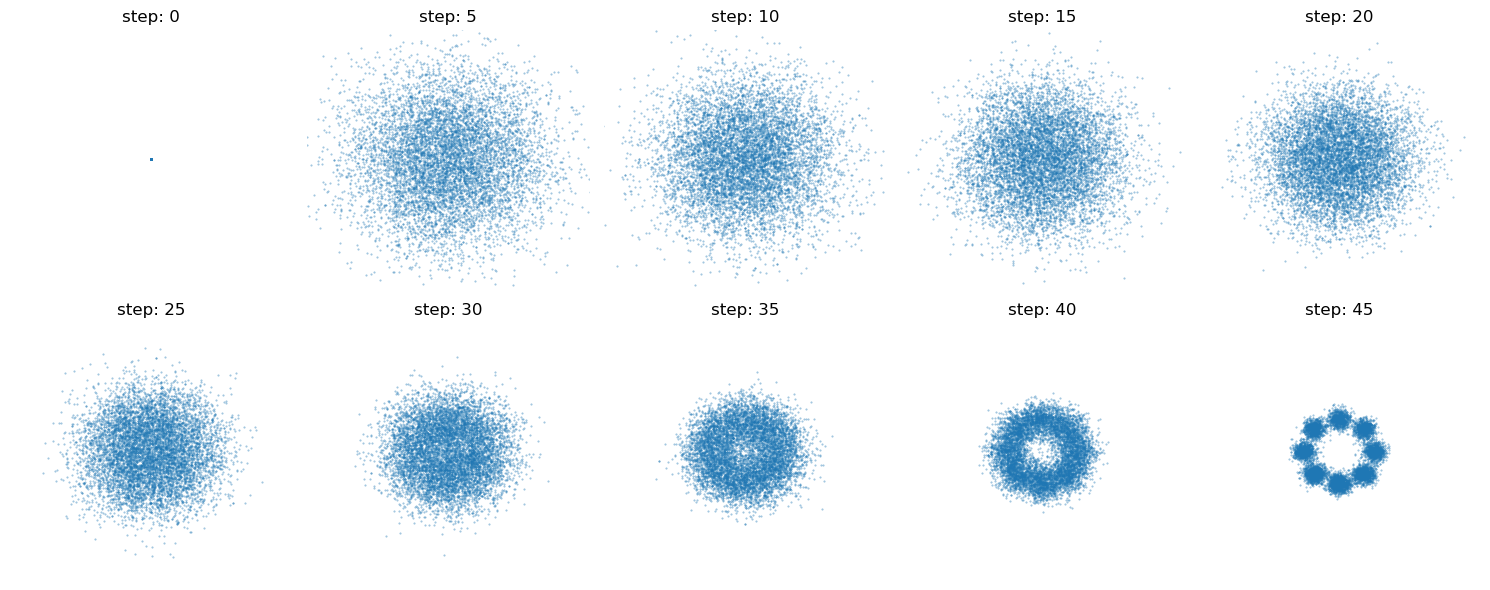

In [64]:
import matplotlib.pyplot as plt
import math
samples_to_draw = ebm_samples

plt.clf()
plt.close('all')
num_cols = 5
num_rows = math.ceil(len(samples_to_draw) / num_cols)
fig = plt.figure(figsize=(15, 6))
for i, sample in enumerate(samples_to_draw):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5, s=0.2)
    plt.title(f"step: {steps[i]}")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis("off")
fig.tight_layout()
# plt.savefig('figures/composition_hmc_product.png')

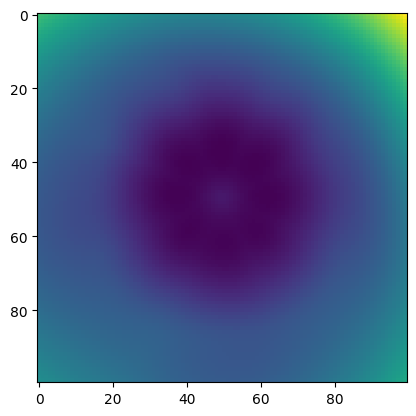

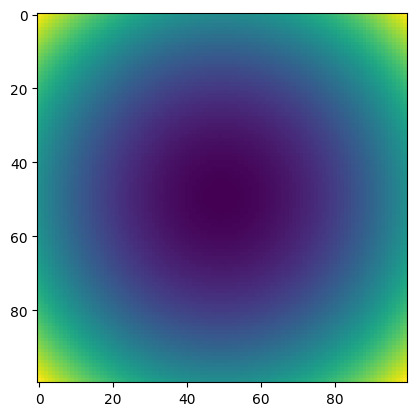

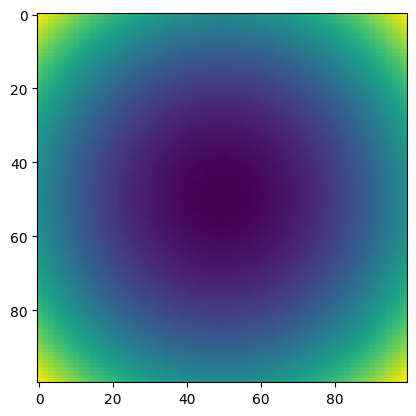

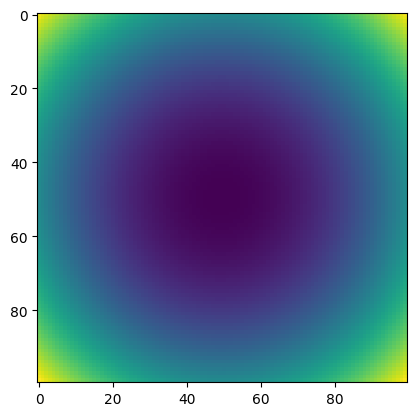

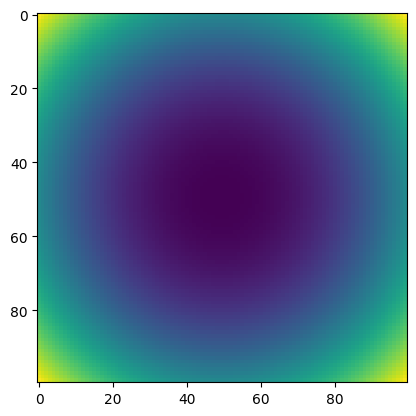

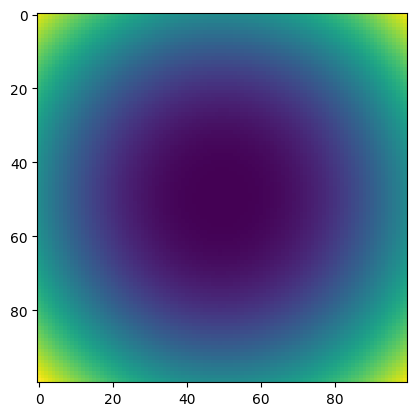

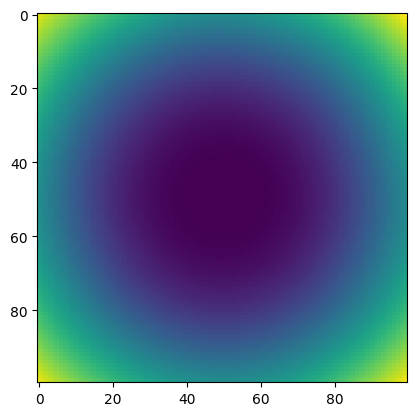

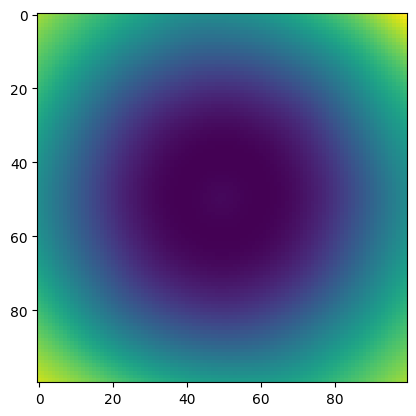

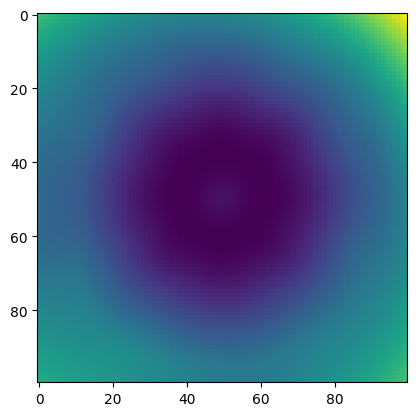

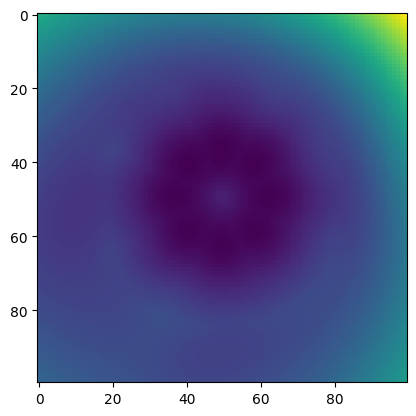

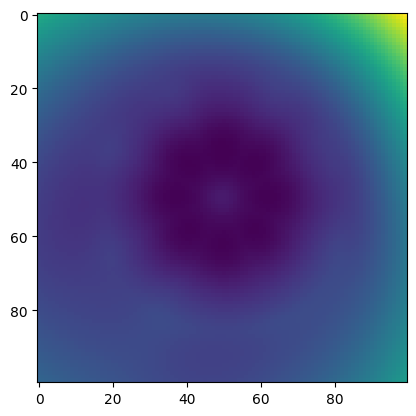

In [51]:
# draw the energy landscape
import matplotlib.pyplot as plt
import numpy as np

# model_to_test = CompositionEnergyMLP(model_1.cuda(), model_2.cuda(), algebra='product')
model_to_test = model_1.cuda()

plt.clf()
plt.close('all')
for t in range(50, -1, -5):
    # meshgrid the space
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    Z = model_to_test.energy(torch.tensor(np.stack([X, Y], axis=-1).reshape(-1, 2)).cuda().float(),t+torch.zeros(10000).long().cuda()).detach().cpu().numpy().reshape(100, 100)
    plt.imshow(Z)
    plt.show()

plt.clf()
plt.close('all')

# W2 distance

In [72]:
import ot
from datasets import generate_data_points
from baselines import evaluate_W2

generated_samples = ebm_samples[-1]
dataset = generate_data_points(n=8000, dataset='product_a1')
w2_distance = evaluate_W2(generated_samples=generated_samples, target_samples=dataset)

print("Wasserstein-2 distance:", w2_distance)

Wasserstein-2 distance: 0.015048928163945777


In [73]:
samples = ebm_baseline(model_to_test)
dataset = generate_data_points(n=8000, dataset='product_a1')
w2_distance = evaluate_W2(generated_samples=generated_samples, target_samples=dataset)

print("Wasserstein-2 distance:", w2_distance)

Wasserstein-2 distance: 0.003003201015293597


# Benchmark Baselines

In [ ]:
# compare EBM with normal diffusion

import ddpm
import torch
from baselines import ebm_baseline, diffusion_baseline, evaluate_W2
from datasets import generate_data_points

model_1 = ddpm.EnergyMLP()
model_2 = ddpm.EnergyMLP()
for method in ['ebm', 'diffusion']:
    method_fn = eval(method+'_baseline')
    for algebra in ['product', 'summation', 'negation']:
        for suffix in ['a1', 'a2', 'a3']:
            environment = algebra + '_' + suffix
            if suffix != 'a3':
                model_1.load_state_dict(torch.load(f"exps/{environment}/ema_model.pth"))
                model_to_test = model_1
            else:
                model_1.load_state_dict(torch.load(f"exps/{algebra}_a1/ema_model.pth"))
                model_2.load_state_dict(torch.load(f"exps/{algebra}_a2/ema_model.pth"))
                model_to_test = ddpm.CompositionEnergyMLP(model_1, model_2, algebra=algebra)
            generated_samples = method_fn(model_to_test)[-1]
            dataset = generate_data_points(n=8000, dataset=environment)
            w2_distance = evaluate_W2(generated_samples=generated_samples, target_samples=dataset)
            
            print(f"{method} for {environment}, Wasserstein-2 distance:", w2_distance)

In [ ]:
# compare EBM across different temperatures

import ddpm
import torch
from baselines import ebm_baseline, diffusion_baseline, evaluate_W2
from datasets import generate_data_points

model_1 = ddpm.EnergyMLP()
model_2 = ddpm.EnergyMLP()
method = 'ebm'
for temperature in [0.1, 0.3, 0.6, 1.0]:
    method_fn = ebm_baseline
    for algebra in ['product', 'summation', 'negation']:
        for suffix in ['a1', 'a2', 'a3']:
            environment = algebra + '_' + suffix
            if suffix != 'a3':
                model_1.load_state_dict(torch.load(f"exps/{environment}/ema_model.pth"))
                model_to_test = model_1
            else:
                model_1.load_state_dict(torch.load(f"exps/{algebra}_a1/ema_model.pth"))
                model_2.load_state_dict(torch.load(f"exps/{algebra}_a2/ema_model.pth"))
                model_to_test = ddpm.CompositionEnergyMLP(model_1, model_2, algebra=algebra)
            generated_samples = method_fn(model_to_test, temperature=temperature)[-1]
            dataset = generate_data_points(n=8000, dataset=environment)
            w2_distance = evaluate_W2(generated_samples=generated_samples, target_samples=dataset)
            
            print(f"{method} with temperature {temperature} for {environment}, Wasserstein-2 distance:", w2_distance)

In [13]:
# compare EBM across different timesteps

import ddpm
import torch
from baselines import ebm_baseline, diffusion_baseline, evaluate_W2, intermediate_distribution
from datasets import generate_data_points
from IPython import embed

model_1 = ddpm.EnergyMLP()
model_2 = ddpm.EnergyMLP()
method = 'ebm'
method_fn = ebm_baseline
for algebra in ['product', 'summation', 'negation']:
    for suffix in ['a1', 'a2', 'a3']:
        environment = algebra + '_' + suffix
        if suffix != 'a3':
            model_1.load_state_dict(torch.load(f"exps/{environment}/ema_model.pth"))
            model_to_test = model_1
        else:
            model_1.load_state_dict(torch.load(f"exps/{algebra}_a1/ema_model.pth"))
            model_2.load_state_dict(torch.load(f"exps/{algebra}_a2/ema_model.pth"))
            model_to_test = ddpm.CompositionEnergyMLP(model_1, model_2, algebra=algebra)
        generated_samples = method_fn(model_to_test)
        dataset = generate_data_points(n=8000, dataset=environment)
        intermediate_samples = intermediate_distribution(data_points=dataset)[1:]
        for i, sample_pair in enumerate(zip(generated_samples, intermediate_samples)):
            w2_distance = evaluate_W2(generated_samples=sample_pair[0], target_samples=sample_pair[1])
            print(f"{method} for {environment}, timestep {i}, Wasserstein-2 distance:", w2_distance)

100%|██████████| 490/490 [00:06<00:00, 77.20it/s]


ebm for product_a1, timestep 0, Wasserstein-2 distance: 0.9191499506123579
ebm for product_a1, timestep 1, Wasserstein-2 distance: 0.09240718123772969
ebm for product_a1, timestep 2, Wasserstein-2 distance: 0.045173872988809406
ebm for product_a1, timestep 3, Wasserstein-2 distance: 0.018844791758721845
ebm for product_a1, timestep 4, Wasserstein-2 distance: 0.010350727568937141
ebm for product_a1, timestep 5, Wasserstein-2 distance: 0.006767264231028103
ebm for product_a1, timestep 6, Wasserstein-2 distance: 0.00479715479958031
ebm for product_a1, timestep 7, Wasserstein-2 distance: 0.004392151477582045
ebm for product_a1, timestep 8, Wasserstein-2 distance: 0.003704005611989476
ebm for product_a1, timestep 9, Wasserstein-2 distance: 0.003503894507699446
ebm for product_a1, timestep 10, Wasserstein-2 distance: 0.0034579133046147514
ebm for product_a1, timestep 11, Wasserstein-2 distance: 0.003243050338366636
ebm for product_a1, timestep 12, Wasserstein-2 distance: 0.002638505711340274

100%|██████████| 490/490 [00:06<00:00, 77.17it/s]


ebm for product_a2, timestep 0, Wasserstein-2 distance: 0.9882956106117194
ebm for product_a2, timestep 1, Wasserstein-2 distance: 0.09172900891141969
ebm for product_a2, timestep 2, Wasserstein-2 distance: 0.03586753208830485
ebm for product_a2, timestep 3, Wasserstein-2 distance: 0.0157176120896693
ebm for product_a2, timestep 4, Wasserstein-2 distance: 0.007260675403849757
ebm for product_a2, timestep 5, Wasserstein-2 distance: 0.005273082016756228
ebm for product_a2, timestep 6, Wasserstein-2 distance: 0.004606647750693823
ebm for product_a2, timestep 7, Wasserstein-2 distance: 0.0038817321901115135
ebm for product_a2, timestep 8, Wasserstein-2 distance: 0.003365025258968667
ebm for product_a2, timestep 9, Wasserstein-2 distance: 0.004820783198541901
ebm for product_a2, timestep 10, Wasserstein-2 distance: 0.0034009923518160574
ebm for product_a2, timestep 11, Wasserstein-2 distance: 0.0030475802227592627
ebm for product_a2, timestep 12, Wasserstein-2 distance: 0.002859775943256191

100%|██████████| 490/490 [00:12<00:00, 39.04it/s]


ebm for product_a3, timestep 0, Wasserstein-2 distance: 0.9459488868028189
ebm for product_a3, timestep 1, Wasserstein-2 distance: 0.008266283679128735
ebm for product_a3, timestep 2, Wasserstein-2 distance: 0.02016737066372667
ebm for product_a3, timestep 3, Wasserstein-2 distance: 0.04869766387620963
ebm for product_a3, timestep 4, Wasserstein-2 distance: 0.05812730915383511
ebm for product_a3, timestep 5, Wasserstein-2 distance: 0.054626231810987545
ebm for product_a3, timestep 6, Wasserstein-2 distance: 0.05339653241027559
ebm for product_a3, timestep 7, Wasserstein-2 distance: 0.05603877202276263
ebm for product_a3, timestep 8, Wasserstein-2 distance: 0.0613606976193879
ebm for product_a3, timestep 9, Wasserstein-2 distance: 0.05470422507337904
ebm for product_a3, timestep 10, Wasserstein-2 distance: 0.05201131373029508
ebm for product_a3, timestep 11, Wasserstein-2 distance: 0.054502471893123856
ebm for product_a3, timestep 12, Wasserstein-2 distance: 0.046664540847726414
ebm for

100%|██████████| 490/490 [00:06<00:00, 77.16it/s]


ebm for summation_a1, timestep 0, Wasserstein-2 distance: 0.9050126021664144
ebm for summation_a1, timestep 1, Wasserstein-2 distance: 0.12891958172761422
ebm for summation_a1, timestep 2, Wasserstein-2 distance: 0.05197933726758445
ebm for summation_a1, timestep 3, Wasserstein-2 distance: 0.022303468818554814
ebm for summation_a1, timestep 4, Wasserstein-2 distance: 0.010985010770807421
ebm for summation_a1, timestep 5, Wasserstein-2 distance: 0.00816670902939607
ebm for summation_a1, timestep 6, Wasserstein-2 distance: 0.0054546144839128915
ebm for summation_a1, timestep 7, Wasserstein-2 distance: 0.003680232966345041
ebm for summation_a1, timestep 8, Wasserstein-2 distance: 0.0033908181691743896
ebm for summation_a1, timestep 9, Wasserstein-2 distance: 0.003499612695088807
ebm for summation_a1, timestep 10, Wasserstein-2 distance: 0.0034078225556035233
ebm for summation_a1, timestep 11, Wasserstein-2 distance: 0.0027231604183421887
ebm for summation_a1, timestep 12, Wasserstein-2 di

100%|██████████| 490/490 [00:06<00:00, 77.27it/s]


ebm for summation_a2, timestep 0, Wasserstein-2 distance: 0.8934886020722389
ebm for summation_a2, timestep 1, Wasserstein-2 distance: 0.12590778823955737
ebm for summation_a2, timestep 2, Wasserstein-2 distance: 0.05255781979106137
ebm for summation_a2, timestep 3, Wasserstein-2 distance: 0.025875986014901358
ebm for summation_a2, timestep 4, Wasserstein-2 distance: 0.011859625743417845
ebm for summation_a2, timestep 5, Wasserstein-2 distance: 0.007598593074426771
ebm for summation_a2, timestep 6, Wasserstein-2 distance: 0.005498902411944364
ebm for summation_a2, timestep 7, Wasserstein-2 distance: 0.00358654607640821
ebm for summation_a2, timestep 8, Wasserstein-2 distance: 0.004666549411595011
ebm for summation_a2, timestep 9, Wasserstein-2 distance: 0.0030706540326300717
ebm for summation_a2, timestep 10, Wasserstein-2 distance: 0.003067961800591268
ebm for summation_a2, timestep 11, Wasserstein-2 distance: 0.0025506798298988395
ebm for summation_a2, timestep 12, Wasserstein-2 dist

100%|██████████| 490/490 [00:12<00:00, 38.62it/s]


ebm for summation_a3, timestep 0, Wasserstein-2 distance: 0.8867881370788967
ebm for summation_a3, timestep 1, Wasserstein-2 distance: 0.037687778341945706
ebm for summation_a3, timestep 2, Wasserstein-2 distance: 0.1467383261206621
ebm for summation_a3, timestep 3, Wasserstein-2 distance: 0.16056612892477062
ebm for summation_a3, timestep 4, Wasserstein-2 distance: 0.14885998512079954
ebm for summation_a3, timestep 5, Wasserstein-2 distance: 0.1550836900433775
ebm for summation_a3, timestep 6, Wasserstein-2 distance: 0.15359204114301034
ebm for summation_a3, timestep 7, Wasserstein-2 distance: 0.14724061572873443
ebm for summation_a3, timestep 8, Wasserstein-2 distance: 0.13221370903290897
ebm for summation_a3, timestep 9, Wasserstein-2 distance: 0.13466947557089975
ebm for summation_a3, timestep 10, Wasserstein-2 distance: 0.12885519711883384
ebm for summation_a3, timestep 11, Wasserstein-2 distance: 0.12204215057280685
ebm for summation_a3, timestep 12, Wasserstein-2 distance: 0.115

100%|██████████| 490/490 [00:06<00:00, 77.27it/s]


ebm for negation_a1, timestep 0, Wasserstein-2 distance: 1.1905803911370463
ebm for negation_a1, timestep 1, Wasserstein-2 distance: 0.07124141785140817
ebm for negation_a1, timestep 2, Wasserstein-2 distance: 0.03787794849643527
ebm for negation_a1, timestep 3, Wasserstein-2 distance: 0.015908141359723252
ebm for negation_a1, timestep 4, Wasserstein-2 distance: 0.008581639466601728
ebm for negation_a1, timestep 5, Wasserstein-2 distance: 0.008744992128827964
ebm for negation_a1, timestep 6, Wasserstein-2 distance: 0.0060860936584467605
ebm for negation_a1, timestep 7, Wasserstein-2 distance: 0.005185788320553897
ebm for negation_a1, timestep 8, Wasserstein-2 distance: 0.0039053634733609063
ebm for negation_a1, timestep 9, Wasserstein-2 distance: 0.004609485622859203
ebm for negation_a1, timestep 10, Wasserstein-2 distance: 0.00398402620676643
ebm for negation_a1, timestep 11, Wasserstein-2 distance: 0.0037889073860533197
ebm for negation_a1, timestep 12, Wasserstein-2 distance: 0.0035

100%|██████████| 490/490 [00:06<00:00, 77.31it/s]


ebm for negation_a2, timestep 0, Wasserstein-2 distance: 0.884233962168648
ebm for negation_a2, timestep 1, Wasserstein-2 distance: 0.10353921207297415
ebm for negation_a2, timestep 2, Wasserstein-2 distance: 0.04352700893878511
ebm for negation_a2, timestep 3, Wasserstein-2 distance: 0.018166252524744794
ebm for negation_a2, timestep 4, Wasserstein-2 distance: 0.010116278647590656
ebm for negation_a2, timestep 5, Wasserstein-2 distance: 0.006021394856838025
ebm for negation_a2, timestep 6, Wasserstein-2 distance: 0.005191087151080869
ebm for negation_a2, timestep 7, Wasserstein-2 distance: 0.004058934808261249
ebm for negation_a2, timestep 8, Wasserstein-2 distance: 0.0032096185113477914
ebm for negation_a2, timestep 9, Wasserstein-2 distance: 0.0028543796266076267
ebm for negation_a2, timestep 10, Wasserstein-2 distance: 0.00271329226231865
ebm for negation_a2, timestep 11, Wasserstein-2 distance: 0.003022541406353412
ebm for negation_a2, timestep 12, Wasserstein-2 distance: 0.003086

100%|██████████| 490/490 [00:12<00:00, 38.65it/s]


ebm for negation_a3, timestep 0, Wasserstein-2 distance: 1.284497146586415
ebm for negation_a3, timestep 1, Wasserstein-2 distance: 0.04943932370901173
ebm for negation_a3, timestep 2, Wasserstein-2 distance: 0.0302851210926092
ebm for negation_a3, timestep 3, Wasserstein-2 distance: 0.01540788127061389
ebm for negation_a3, timestep 4, Wasserstein-2 distance: 0.010368485333401557
ebm for negation_a3, timestep 5, Wasserstein-2 distance: 0.0069650524846802155
ebm for negation_a3, timestep 6, Wasserstein-2 distance: 0.007624162708931193
ebm for negation_a3, timestep 7, Wasserstein-2 distance: 0.006149159125518037
ebm for negation_a3, timestep 8, Wasserstein-2 distance: 0.007358050176917449
ebm for negation_a3, timestep 9, Wasserstein-2 distance: 0.006931523949358939
ebm for negation_a3, timestep 10, Wasserstein-2 distance: 0.007774455518956531
ebm for negation_a3, timestep 11, Wasserstein-2 distance: 0.006347737120377121
ebm for negation_a3, timestep 12, Wasserstein-2 distance: 0.00728976

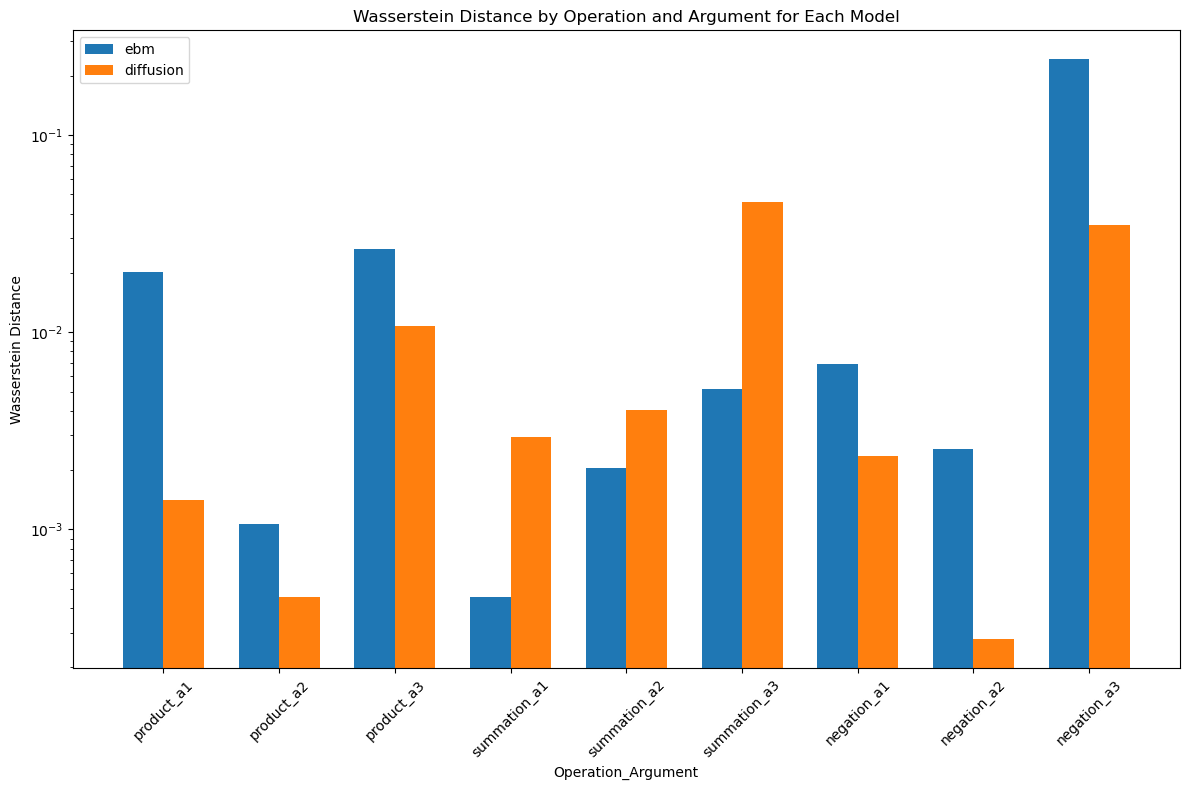

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("exps/baselines.csv")

# Convert 'wasserstein_2_distance' column to float
df['wasserstein_2_distance'] = df['wasserstein_2_distance'].astype(float)

# Combine 'operation' and 'argument' columns
df['op_arg'] = df['operation'] + '_' + df['argument']

# Get unique combinations of operation and argument
unique_combinations = df['op_arg'].unique()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define width for each group of bars
bar_width = 0.35

# Define index for each group
index = np.arange(len(unique_combinations))

# Plot bars for 'ebm'
ax.bar(index - bar_width/2, df[df['model_name']=='ebm']['wasserstein_2_distance'], bar_width, label='ebm')

# Plot bars for 'diffusion'
ax.bar(index + bar_width/2, df[df['model_name']=='diffusion']['wasserstein_2_distance'], bar_width, label='diffusion')

# Set x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(unique_combinations, rotation=45)

# Set labels and title
ax.set_xlabel('Operation_Argument')
ax.set_ylabel('Wasserstein Distance')
ax.set_title('Wasserstein Distance by Operation and Argument for Each Model')
ax.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()

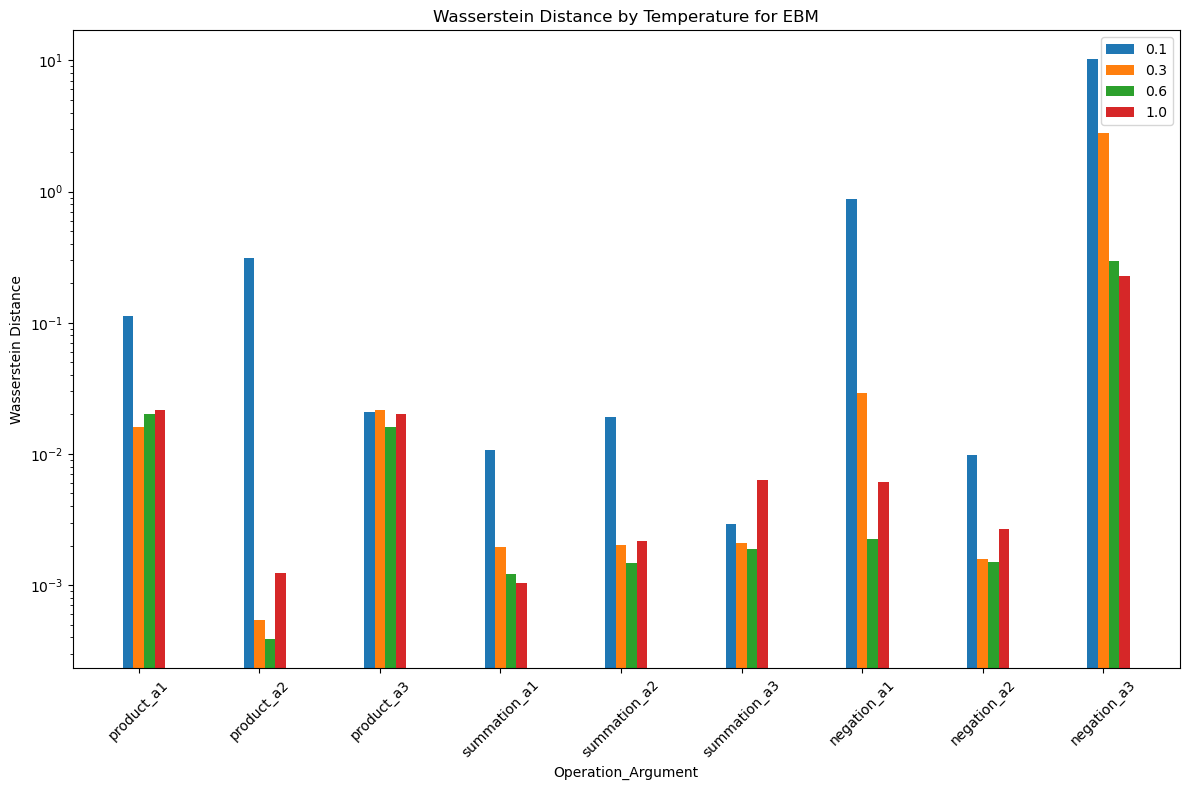

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("exps/temperatures.csv")

# Convert 'wasserstein_2_distance' column to float
df['wasserstein_2_distance'] = df['wasserstein_2_distance'].astype(float)

# Combine 'operation' and 'argument' columns
df['op_arg'] = df['operation'] + '_' + df['argument']

# Get unique combinations of operation and argument
unique_combinations = df['op_arg'].unique()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define width for each group of bars
bar_width = 0.35

# Define index for each group
index = np.arange(len(unique_combinations))

for i, temperature in enumerate([0.1, 0.3, 0.6, 1.0]):
    ax.bar(index + (i+1) * bar_width/4 - bar_width/2, df[df['temperature']==temperature]['wasserstein_2_distance'], bar_width/4, label=temperature)

# Set x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(unique_combinations, rotation=45)

# Set labels and title
ax.set_xlabel('Operation_Argument')
ax.set_ylabel('Wasserstein Distance')
ax.set_title('Wasserstein Distance by Temperature for EBM')
ax.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()

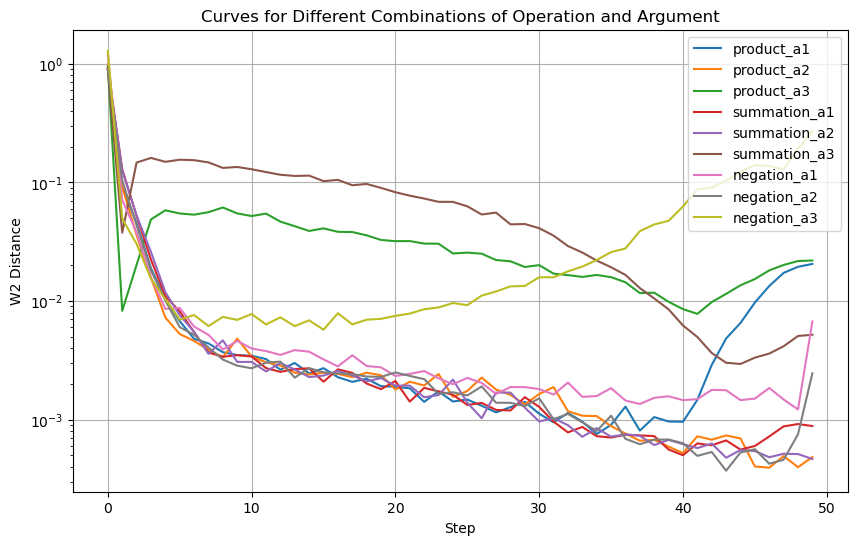

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Read the CSV file into a DataFrame
df = pd.read_csv("exps/timesteps.csv")

# Combine 'operation' and 'argument' columns
df['op_arg'] = df['operation'] + '_' + df['argument'].astype(str)

# Get unique combinations of operation and argument
unique_combinations = df['op_arg'].unique()

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate over unique combinations
for combination in unique_combinations:
    # Filter the dataframe for the current combination
    df_comb = df[df['op_arg'] == combination]
    
    # Ensure there is data to plot
    if not df_comb.empty:
        plt.plot(df_comb['timestep'], df_comb['wasserstein_2_distance'], label=combination)

# Add title and labels
plt.title('Curves for Different Combinations of Operation and Argument')
plt.xlabel('Step')
plt.ylabel('W2 Distance')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()